Задание 29.11

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest


#Номер 1

In [2]:
import numpy as np

# Задаем параметры
N = 103
n_values = [10, 50, 100, 150, 200, 500]

# Выбор распределений
distributions = {
    "standard_normal": lambda n: np.random.normal(0, 1, n),
    "uniform": lambda n: np.random.uniform(0, 1, n),
    "exponential": lambda n: np.random.exponential(1, n),
    "lognormal": lambda n: np.random.lognormal(0, 1, n),
    "gamma": lambda n: np.random.gamma(2, 2, n),
    "beta": lambda n: np.random.beta(2, 5, n),
}

# Генерация выборок
samples = {dist: {n: [func(n) for _ in range(N)] for n in n_values} for dist, func in distributions.items()}

# Проверяем сгенерированные данные
for dist in samples:
    print(f"Generated {dist} samples for n={n_values}")

Generated standard_normal samples for n=[10, 50, 100, 150, 200, 500]
Generated uniform samples for n=[10, 50, 100, 150, 200, 500]
Generated exponential samples for n=[10, 50, 100, 150, 200, 500]
Generated lognormal samples for n=[10, 50, 100, 150, 200, 500]
Generated gamma samples for n=[10, 50, 100, 150, 200, 500]
Generated beta samples for n=[10, 50, 100, 150, 200, 500]


#Номер 2

In [11]:
# Функция для проверки нормальности
def check_normality(samples):
    results = {dist: {n: {'shapiro': [], 'normaltest': []} for n in n_values} for dist in samples}

    for dist, sample_dict in samples.items():
        for n, sample_list in sample_dict.items():
            for sample in sample_list:
                # Критерий Шапиро-Уилка
                shapiro_stat, shapiro_p = shapiro(sample)
                results[dist][n]['shapiro'].append(shapiro_p)

                # Критерий Шапиро-Франция (D'Agostino’s K-squared test)
                _, p = normaltest(sample)
                results[dist][n]['normaltest'].append(p)

    return results

# Проверяем нормальность
normality_results = check_normality(samples)
print(normality_results)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


{'standard_normal': {10: {'shapiro': [0.4505202057257062, 0.9133898387106232, 0.13663574981427934, 0.6118763390754375, 0.7873824818262345, 0.32160906904738445, 0.5742484157258263, 0.26934478029158615, 0.45215232937977223, 0.1504775119641505, 0.6291952116325433, 0.9087464524130641, 0.008161890697952732, 0.7677206691158139, 0.46764492148984305, 0.3217985341943803, 0.8212582795155496, 0.8422786282386949, 0.703439158156479, 0.0008008699400602303, 0.7177984021271159, 0.31513498168546955, 0.6153403006681445, 0.046337084477171414, 0.5294125344573706, 0.3975985329129293, 0.49031094242370393, 0.992415652319032, 0.11623689157796935, 0.6004553552387792, 0.031254898159723876, 0.24224882726996133, 0.028746082626841706, 0.5861206523657538, 0.7318277932668165, 0.9517583617864912, 0.9156820298711961, 0.8493270872559122, 0.44696263631619215, 0.4832156201067155, 0.3247220214496732, 0.9547122828807687, 0.11416520951396647, 0.8212429772438035, 0.09634156288535056, 0.4522184835235287, 0.6609152597516914, 0

#Номер 3

In [5]:
# Исследование уровня значимости
alpha = 0.05
size_results = {n: [] for n in n_values}

for n in n_values:
    p_values = [result['shapiro'] for dist in samples for result in normality_results[dist][n]['shapiro']]
    alpha_star = np.mean(np.array(p_values) > alpha)  # реальное alpha* для данного n
    size_results[n].append(alpha_star)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(size_results.keys(), [result[0] for result in size_results.values()], marker='o')
plt.axhline(y=alpha, color='r', linestyle='--', label='alpha = 0.05')
plt.title('Зависимость alpha* от размера выборки n')
plt.xlabel('Размер выборки n')
plt.ylabel('alpha*')
plt.xticks(size_results.keys())
plt.legend()
plt.grid(True)
plt.show()

IndexError: invalid index to scalar variable.

#Номер 4

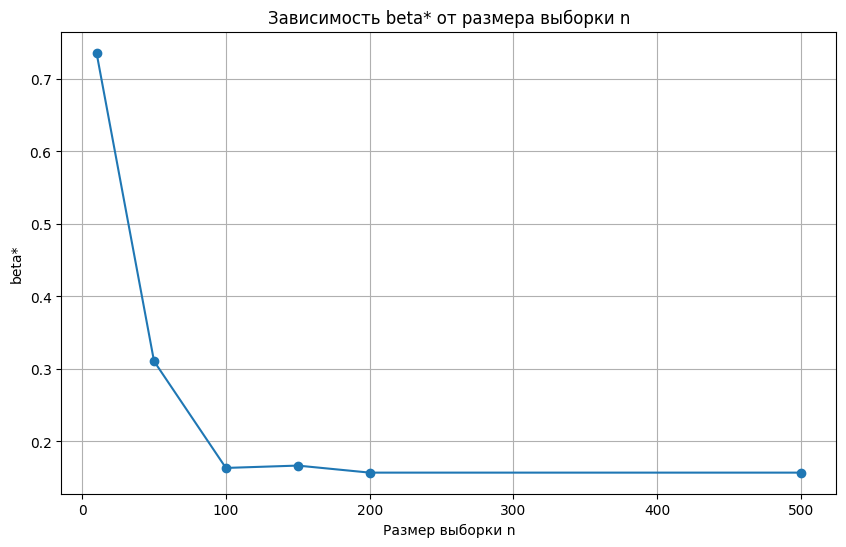

In [9]:
# Исследование доли случаев
beta_results = {n: [] for n in n_values}

for n in n_values:
    total_samples = 0
    normal_samples = 0

    for dist in samples:
        for sample in samples[dist][n]:
            total_samples += 1
            if shapiro(sample)[1] > alpha:  # p-value > alpha, значит выброс не нормальный
                normal_samples += 1

    beta_star = normal_samples / total_samples
    beta_results[n].append(beta_star)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(beta_results.keys(), [result[0] for result in beta_results.values()], marker='o')
plt.title('Зависимость beta* от размера выборки n')
plt.xlabel('Размер выборки n')
plt.ylabel('beta*')
plt.grid(True)
plt.show()

#ДЗ(номер 6)

In [12]:
N = 100  # Количество выборок для каждой n
n_values = [10, 50, 100, 150, 200, 500]

# Генерация выборок из распределений с различными эксцессами
# Установим фиксированные параметры для различных распределений
distributions = {
    "normal": lambda n: np.random.normal(0, 1, n),                # Эксцесс = 0
    "exponential": lambda n: np.random.exponential(1, n),        # Эксресс > 0
    "gamma": lambda n: np.random.gamma(2, 2, n),                 # Эксцесс > 0
    "lognormal": lambda n: np.random.lognormal(0, 1, n),         # Эксцесс > 0
    "uniform": lambda n: np.random.uniform(0, 1, n),              # Эксцесс = -1.2
    "beta": lambda n: np.random.beta(2, 5, n),                    # Эксцесс < 0
}

# Генерируем выборки
samples = {dist: {n: [func(n) for _ in range(N)] for n in n_values} for dist, func in distributions.items()}

# Проверим, какие распределения были сгенерированы
for dist in samples:
    print(f"Generated {dist} samples for n={n_values}")

Generated normal samples for n=[10, 50, 100, 150, 200, 500]
Generated exponential samples for n=[10, 50, 100, 150, 200, 500]
Generated gamma samples for n=[10, 50, 100, 150, 200, 500]
Generated lognormal samples for n=[10, 50, 100, 150, 200, 500]
Generated uniform samples for n=[10, 50, 100, 150, 200, 500]
Generated beta samples for n=[10, 50, 100, 150, 200, 500]


In [13]:
from scipy.stats import shapiro, normaltest, kurtosis

# Функция для проверки нормальности и вычисления эксцесса
def check_normality_and_kurtosis(samples):
    results = {dist: {n: {'shapiro': [], 'normaltest': [], 'kurtosis': []} for n in n_values} for dist in samples}

    for dist, sample_dict in samples.items():
        for n, sample_list in sample_dict.items():
            for sample in sample_list:
                # Критерий Шапиро-Уилка
                shapiro_stat, shapiro_p = shapiro(sample)
                results[dist][n]['shapiro'].append(shapiro_p)

                # Критерий Д'Алембера
                k2_stat, k2_p = normaltest(sample)
                results[dist][n]['normaltest'].append(k2_p)

                # Экцес
                kurt = kurtosis(sample)
                results[dist][n]['kurtosis'].append(kurt)

    return results

# Проводим тесты
results = check_normality_and_kurtosis(samples)

In [14]:
# Функция для анализа результатов
def analyze_results(results):
    analysis = {}

    for dist, n_dict in results.items():
        for n, metrics in n_dict.items():
            shapiro_rejections = np.sum(np.array(metrics['shapiro']) < 0.05)
            normaltest_rejections = np.sum(np.array(metrics['normaltest']) < 0.05)
            avg_kurtosis = np.mean(metrics['kurtosis'])

            analysis[(dist, n)] = {
                'shapiro_rejections': shapiro_rejections,
                'normaltest_rejections': normaltest_rejections,
                'average_kurtosis': avg_kurtosis,
            }

    return analysis

# Получаем анализ
analysis = analyze_results(results)

# Выводим результаты анализа
for key, value in analysis.items():
    print(f"Distribution: {key[0]}, Sample size: {key[1]}, Shapiro Rejections: {value['shapiro_rejections']}, "
          f"Normaltest Rejections: {value['normaltest_rejections']}, Average Kurtosis: {value['average_kurtosis']}")

Distribution: normal, Sample size: 10, Shapiro Rejections: 4, Normaltest Rejections: 5, Average Kurtosis: -0.5693656034918249
Distribution: normal, Sample size: 50, Shapiro Rejections: 7, Normaltest Rejections: 6, Average Kurtosis: -0.12247746408528862
Distribution: normal, Sample size: 100, Shapiro Rejections: 7, Normaltest Rejections: 7, Average Kurtosis: 0.012089292741766929
Distribution: normal, Sample size: 150, Shapiro Rejections: 6, Normaltest Rejections: 7, Average Kurtosis: -0.02743075408596742
Distribution: normal, Sample size: 200, Shapiro Rejections: 4, Normaltest Rejections: 2, Average Kurtosis: 0.003293698863557215
Distribution: normal, Sample size: 500, Shapiro Rejections: 3, Normaltest Rejections: 2, Average Kurtosis: -0.015255050626131209
Distribution: exponential, Sample size: 10, Shapiro Rejections: 44, Normaltest Rejections: 37, Average Kurtosis: 0.28685474715987647
Distribution: exponential, Sample size: 50, Shapiro Rejections: 100, Normaltest Rejections: 97, Avera